In [1]:
# این بخش پکیج هایی که از آن ها استفاده می کنیم را وارد می کنیم

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# دبی لازم را که بیست متر مکعب در روز است را به سیستم استاندارد تبدیل می کنیم
# 
Q = 20 / ( 60 * 60)
print('Q = {} m^3/s'.format(round(Q,6)))


Q = 0.005556 m^3/s


In [3]:
# تابعی تعریف می کنیم که بر اساس دبی و سرعت جریان قطر لوله را به ما برمی گرداند

# Q : دبی سیال
# U : سرعت سیال

def diameter(Q, U):
    return math.sqrt((4 * Q) / (math.pi * U))


In [4]:
# حال تابعی می نویسیم که عدد رینولز را به ما بدهد

# ro : جرم حجمی
# U : سرعت سیال
# miu : ویسکوزیته سیال
# D :  قطر لوله

def Reynolds(ro, U, miu, D):
    return (ro * U * D) / miu


In [5]:
# تابعی می نویسیم که بر اساس زبری قطر لوله و عدد رینولز ضریب اصطکاک را حساب کند
# برای جریان های آرام از رابطه دارسی و برای جریان های ناآرام از رابطه فون کارمن استفاده می کنیم

def friction_factor(Re, e, D):
    rel_e = e/D
    if Re <=2100:
        return (64 / Re)
    
    elif Re > 2100:
        x = -2.0 * math.log(rel_e / 3.7, 10)
        return 1/(x**2)


In [6]:
# با استفاده از ضریب اصطکاک، طول خط لوله، قطر لوله، سرعت سیال و مجموع ضریاب تلفات هد تلفات کل را تعیین می کنیم

def Pressure_Loss(f, L, D, U , K):
    g = 9.81
    return ((U ** 2) / (2 * g)) * ( ((f * L) / D) + K )


In [7]:
# ثوابت از جمله جرم حجمی، ویسکوزیته آب و زبری لوله را تعریف می کنیم

ro  = 970                 # kg/m^3
miu = 0.001               # Pa.s
e   = 0.0015 * (10**-3)   # 0.000 000 15 m
L   = 901                 # m
sum_K = 6 * 0.45


In [8]:

data = np.linspace(1,3,200)
df = pd.DataFrame({'U (m/s)' : data})

In [9]:

df['D (m)'] = df.apply(lambda x: diameter(Q, x['U (m/s)']), axis = 1)

In [10]:

df['Reynolds'] = df.apply(lambda x: Reynolds(ro, x['U (m/s)'], miu, x['D (m)']), axis = 1)

In [11]:

df['f'] = df.apply(lambda x: friction_factor(x['Reynolds'], e, x['D (m)']), axis = 1)

In [12]:

df['Pressure_Loss (m)'] = df.apply(lambda x: Pressure_Loss(x['f'], L, x['D (m)'], x['U (m/s)'], sum_K), axis = 1)

In [13]:
df.head(10)

,U (m/s),D (m),Reynolds,f,Pressure_Loss (m)
0,1.000000,0.084104,81581.284879,0.008843,5.119164
1,1.010050,0.083685,81990.216187,0.008851,5.251318
2,1.020101,0.083272,82397.118022,0.008858,5.385536
3,1.030151,0.082864,82802.020304,0.008865,5.521829
4,1.040201,0.082463,83204.952222,0.008872,5.660209
5,1.050251,0.082068,83605.942267,0.008879,5.800687
6,1.060302,0.081678,84005.018244,0.008886,5.943276
7,1.070352,0.081293,84402.207306,0.008893,6.087985
8,1.080402,0.080914,84797.535968,0.008900,6.234828
9,1.090452,0.080541,85191.030127,0.008906,6.383814


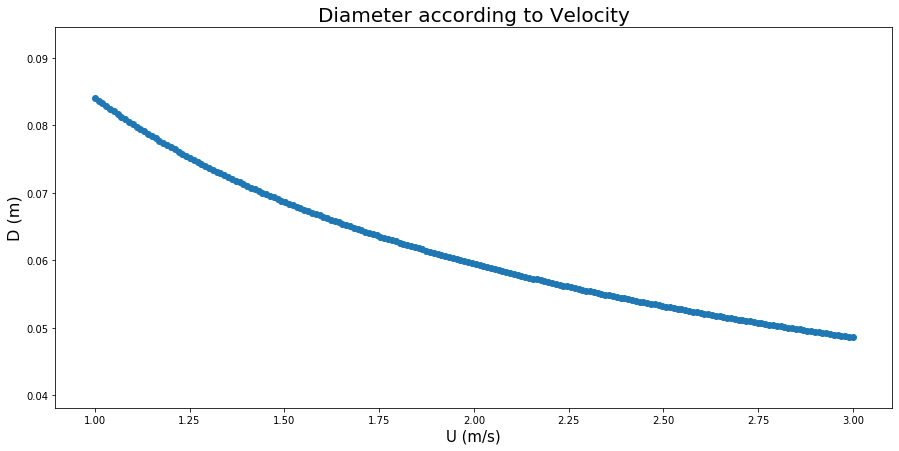

In [14]:
plt.figure(figsize = (15, 7))
plt.xlabel('U (m/s)', {'fontsize':15})
plt.ylabel('D (m)', {'fontsize':16})
plt.title('Diameter according to Velocity', {'fontsize':20})
plt.scatter(df['U (m/s)'],df['D (m)'])

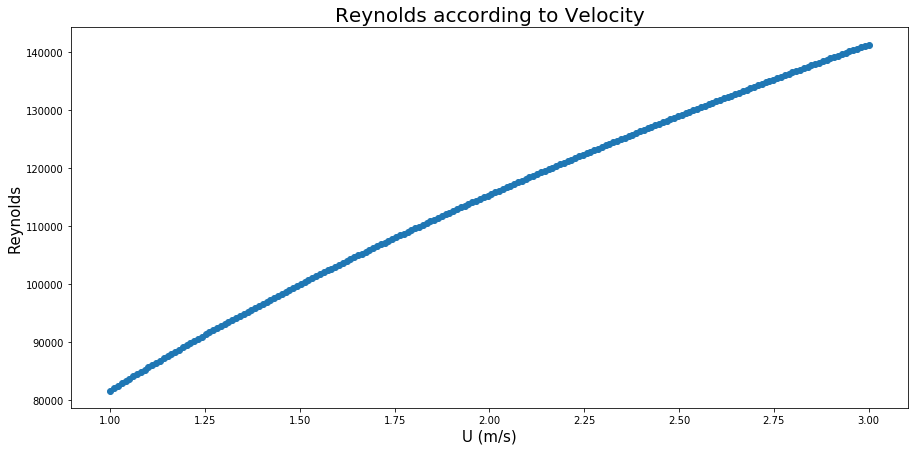

In [15]:
plt.figure(figsize = (15, 7))
plt.xlabel('U (m/s)' ,{'fontsize':15})
plt.ylabel('Reynolds' ,{'fontsize':15})
plt.title('Reynolds according to Velocity', {'fontsize':20})
plt.scatter(df['U (m/s)'],df['Reynolds'])

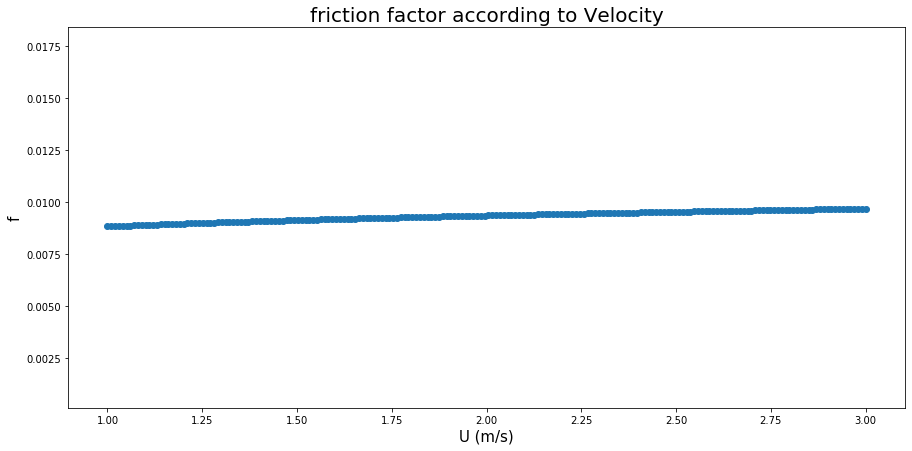

In [16]:
plt.figure(figsize = (15, 7))
plt.xlabel('U (m/s)',{'fontsize':15})
plt.ylabel('f' ,{'fontsize':15})
plt.title('friction factor according to Velocity', {'fontsize':20})
plt.scatter(df['U (m/s)'],df['f'])

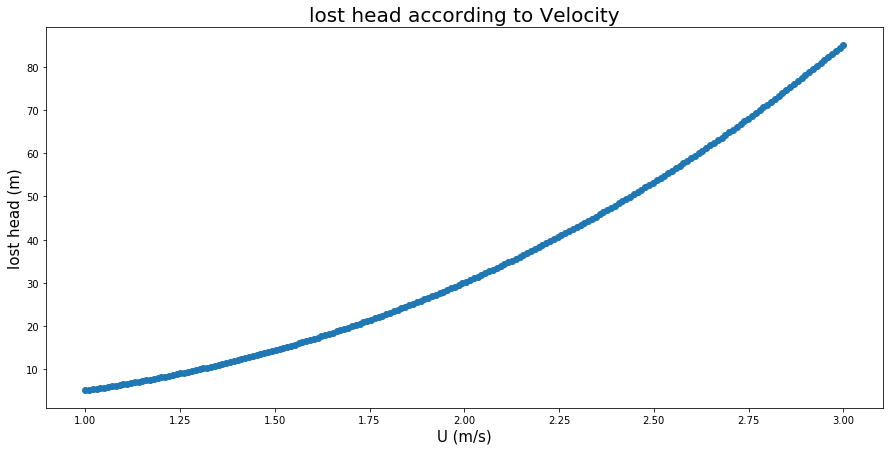

In [17]:
plt.figure(figsize = (15, 7))
plt.xlabel('U (m/s)',{'fontsize':15})
plt.ylabel('lost head (m)' ,{'fontsize':15})
plt.title('lost head according to Velocity', {'fontsize':20})
plt.scatter(df['U (m/s)'],df['Pressure_Loss (m)'])